In [10]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [24]:
pip install ace


Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json

In [3]:
datasets = {
    'armors': pd.read_csv('/Users/sri00266/Desktop/elden_ring/data/armors.csv'),
    'ashes': pd.read_csv('/Users/sri00266/Desktop/elden_ring/data/ashes.csv'),
    'bosses': pd.read_csv('/Users/sri00266/Desktop/elden_ring/data/bosses.csv'),
    'incantations': pd.read_csv('/Users/sri00266/Desktop/elden_ring/data/incantations.csv'),
    'items': pd.read_csv('/Users/sri00266/Desktop/elden_ring/data/items.csv'),
    'sorceries': pd.read_csv('/Users/sri00266/Desktop/elden_ring/data/sorceries.csv'),
    'talismans': pd.read_csv('/Users/sri00266/Desktop/elden_ring/data/talismans.csv'),
    'weapons': pd.read_csv('/Users/sri00266/Desktop/elden_ring/data/weapons.csv')
}

In [4]:
def clean_data(df, json_columns=[]):
    # Handle missing values
    df = df.dropna(subset=['id', 'name'])
    
    # Convert JSON strings to dicts
    for col in json_columns:
        def parse_json(x):
            if pd.isnull(x):
                return []
            try:
                return json.loads(x.replace("'", '"'))
            except (json.JSONDecodeError, TypeError):
                return []
        
        df[col] = df[col].apply(parse_json)
    
    return df

In [5]:
datasets['armors'] = clean_data(datasets['armors'], ['dmgNegation', 'resistance'])
datasets['weapons'] = clean_data(datasets['weapons'], ['attack', 'defence', 'scalesWith', 'requiredAttributes'])
datasets['incantations'] = clean_data(datasets['incantations'], ['requires'])
datasets['sorceries'] = clean_data(datasets['sorceries'], ['requires'])

for name, df in datasets.items():
    print(f"Dataset: {name}")
    print(df.head())
    print("\n")

Dataset: armors
                                id                         name  \
0    17f696e0685l0i0nblzy58h0qvewk          All-knowing Greaves   
1  17f69515b49l0i0nbno079cqzlskebf            All-knowing Armor   
2   17f69751613l0i0nbp9nsdqjza4rxf             All-knowing Helm   
3    17f696221c3l0i0nbrxr4gcdi7uag    Alberich's Robe (altered)   
4    17f69b8efedl0i0nbtfdfkxtl7iqc  All-knowing Armor (altered)   

                                               image  \
0  https://eldenring.fanapis.com/images/armors/17...   
1  https://eldenring.fanapis.com/images/armors/17...   
2  https://eldenring.fanapis.com/images/armors/17...   
3  https://eldenring.fanapis.com/images/armors/17...   
4  https://eldenring.fanapis.com/images/armors/17...   

                                         description     category  \
0  Greaves set with countless eyes and ears. Worn...    Leg Armor   
1  Armor set with countless eyes and ears. Worn b...  Chest Armor   
2  Helm set with countless eyes and e

In [6]:
#identifying the most powerful weapon and armor

# Calculate average attack power for weapons
def calculate_average_attack(attack_list):
    if len(attack_list) == 0:
        return 0
    return sum(d['amount'] for d in attack_list) / len(attack_list)

weapons_df = datasets['weapons']
weapons_df['average_attack'] = weapons_df['attack'].apply(calculate_average_attack)

most_powerful_weapon = weapons_df.loc[weapons_df['average_attack'].idxmax()]

# Calculate total damage negation and resistance for armors
def calculate_total_stat(stat_list):
    return sum(d['amount'] for d in stat_list) if len(stat_list) > 0 else 0

armors_df = datasets['armors']
armors_df['total_dmgNegation'] = armors_df['dmgNegation'].apply(calculate_total_stat)
armors_df['total_resistance'] = armors_df['resistance'].apply(calculate_total_stat)
armors_df['total_protection'] = armors_df['total_dmgNegation'] + armors_df['total_resistance']

most_powerful_armor = armors_df.loc[armors_df['total_protection'].idxmax()]

most_powerful_weapon, most_powerful_armor


(id                                       17f69a5df3cl0i1pboo1un3fj711tg
 name                                           Gargoyle's Black Halberd
 image                 https://eldenring.fanapis.com/images/weapons/1...
 description           Bronze halberd wielded by Valiant Gargoyle, me...
 attack                [{'name': 'Phy', 'amount': 103}, {'name': 'Mag...
 defence               [{'name': 'Phy', 'amount': 48}, {'name': 'Mag'...
 scalesWith            [{'name': 'Str', 'scaling': 'D'}, {'name': 'De...
 requiredAttributes    [{'name': 'Str', 'amount': 26}, {'name': 'Dex'...
 category                                                        Halberd
 weight                                                             12.0
 average_attack                                                54.333333
 Name: 187, dtype: object,
 id                                      17f698fce7fl0i0nqodwfje5g7qdem
 name                                                Fire Prelate Armor
 image                http

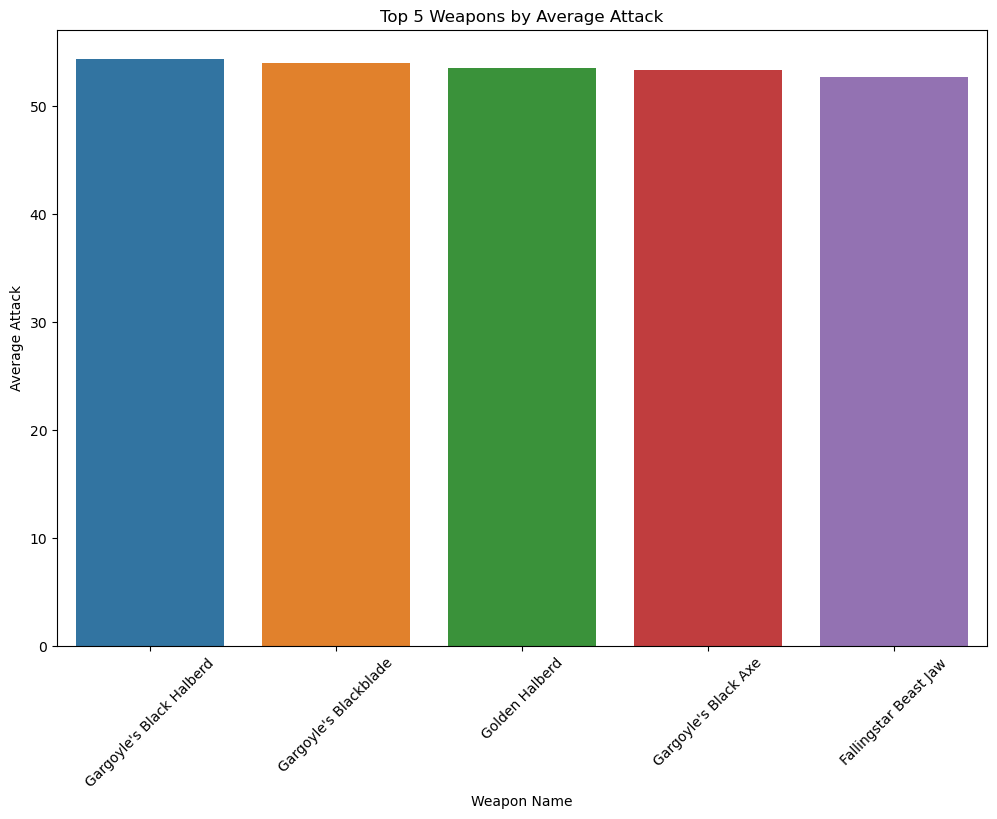

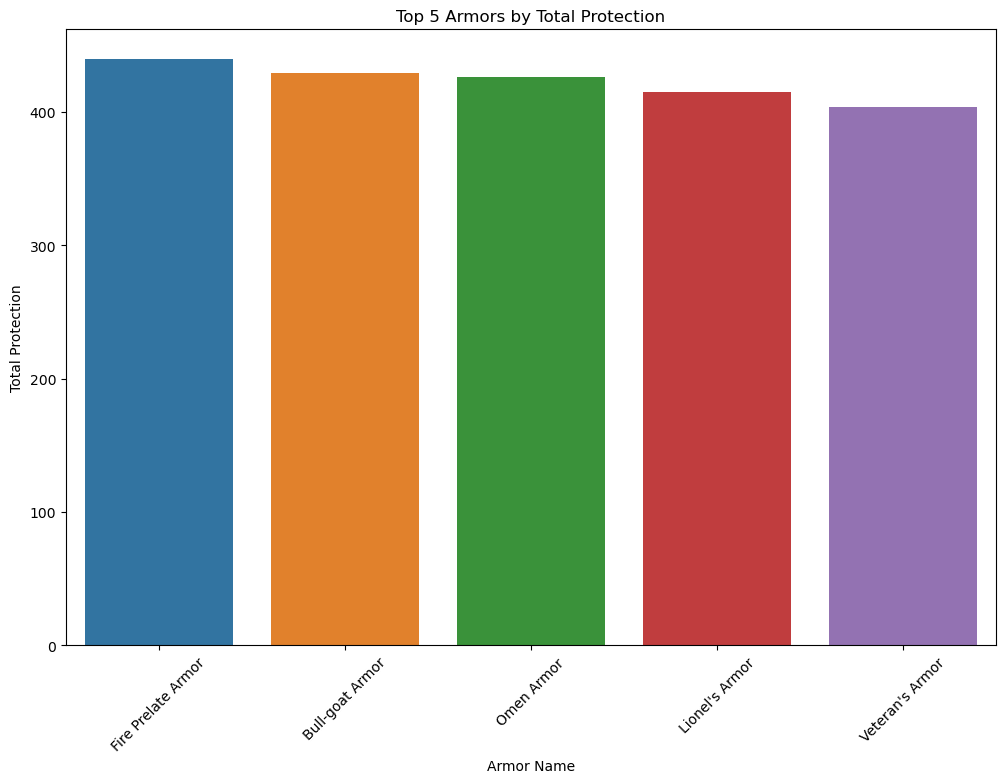

In [7]:
# visualizing the most powerful weapon and armor
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 weapons by average attack
top_5_weapons = weapons_df.nlargest(5, 'average_attack')
# Get top 5 armors by total protection
top_5_armors = armors_df.nlargest(5, 'total_protection')

# Visualize the most powerful weapon
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_weapons, x='name', y='average_attack')
plt.title('Top 5 Weapons by Average Attack')
plt.xlabel('Weapon Name')
plt.ylabel('Average Attack')
plt.xticks(rotation=45)
plt.show()

# Visualize the most powerful armor
plt.figure(figsize=(12, 8))
sns.barplot(data=top_5_armors, x='name', y='total_protection')
plt.title('Top 5 Armors by Total Protection')
plt.xlabel('Armor Name')
plt.ylabel('Total Protection')
plt.xticks(rotation=45)
plt.show()

In [8]:
#identifying the efficient weapon against all the bosses. assuming equal efficieny for all bosses.
# Calculate efficiency score based on average attack and defense
bosses_df = datasets['bosses']
weapon_efficiency = weapons_df.copy()

weapon_efficiency['efficiency_score'] = weapon_efficiency['average_attack']  # Simplified

most_efficient_weapon = weapon_efficiency.loc[weapon_efficiency['efficiency_score'].idxmax()]

most_efficient_weapon


id                                       17f69a5df3cl0i1pboo1un3fj711tg
name                                           Gargoyle's Black Halberd
image                 https://eldenring.fanapis.com/images/weapons/1...
description           Bronze halberd wielded by Valiant Gargoyle, me...
attack                [{'name': 'Phy', 'amount': 103}, {'name': 'Mag...
defence               [{'name': 'Phy', 'amount': 48}, {'name': 'Mag'...
scalesWith            [{'name': 'Str', 'scaling': 'D'}, {'name': 'De...
requiredAttributes    [{'name': 'Str', 'amount': 26}, {'name': 'Dex'...
category                                                        Halberd
weight                                                             12.0
average_attack                                                54.333333
efficiency_score                                              54.333333
Name: 187, dtype: object

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


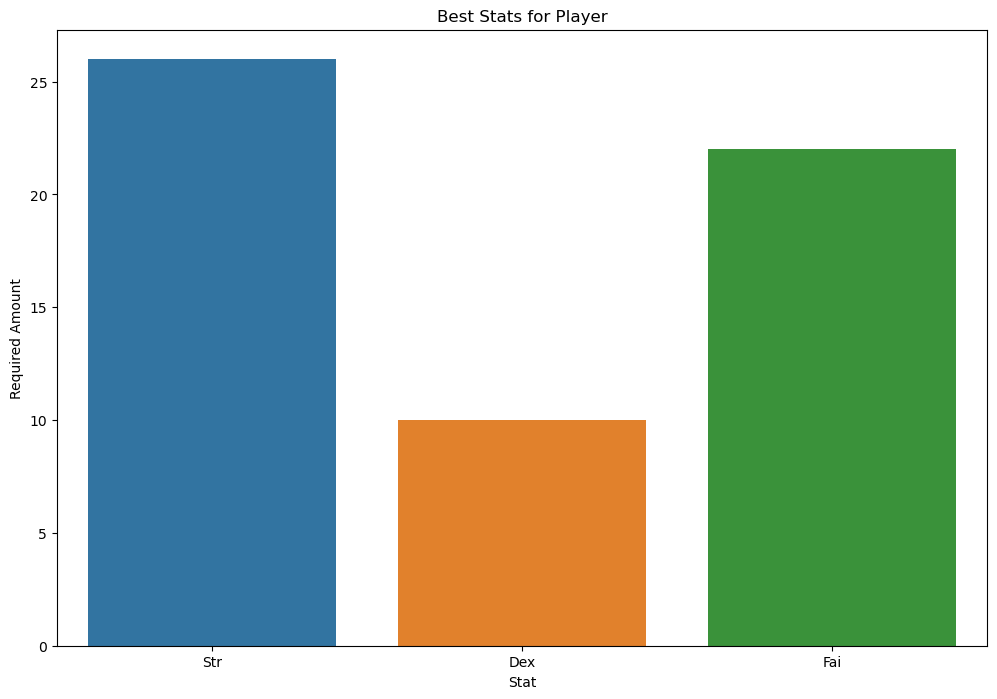

In [9]:



# Calculate best stats for player
most_powerful_weapon = weapons_df.loc[weapons_df['average_attack'].idxmax()]
most_powerful_armor = armors_df.loc[armors_df['total_protection'].idxmax()]

# Extract required attributes for the best weapon and armor
best_stats_weapon = most_powerful_weapon['requiredAttributes']
best_stats_armor = most_powerful_armor.get('requiredAttributes', [])

# Combine and aggregate stats
best_stats = best_stats_weapon + best_stats_armor

from collections import Counter
best_stats_aggregated = Counter()

for stat in best_stats:
    best_stats_aggregated[stat['name']] += stat['amount']

# Visualize best stats for player
plt.figure(figsize=(12, 8))
sns.barplot(x=list(best_stats_aggregated.keys()), y=list(best_stats_aggregated.values()))
plt.title('Best Stats for Player')
plt.xlabel('Stat')
plt.ylabel('Required Amount')
plt.show()

             name  efficiency_score
0        Hand Axe         35.500000
1     Jawbone Axe         37.333333
2  Forked Hatchet         33.500000
3    Iron Cleaver         36.666667
4      Battle Axe         37.166667


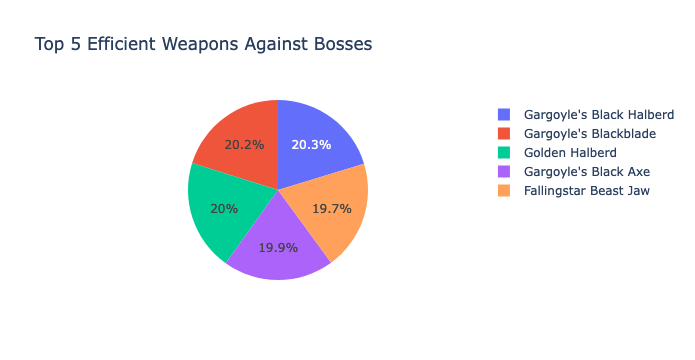

In [21]:
def calculate_average_attack(attack_list):
    if len(attack_list) == 0:
        return 0
    return sum(d['amount'] for d in attack_list) / len(attack_list)

weapons_df = datasets['weapons']
weapons_df['average_attack'] = weapons_df['attack'].apply(calculate_average_attack)

weapons_df['efficiency_score'] = weapons_df['average_attack']

print(weapons_df[['name', 'efficiency_score']].head())
# Interactive visualization for top 5 efficient weapons

fig = px.pie(
    top_5_efficient_weapons,
    names='name',
    values='efficiency_score',
    title='Top 5 Efficient Weapons Against Bosses'
)

fig.show()


                   name  total_protection
84   Fire Prelate Armor             440.0
39      Bull-goat Armor             429.0
141          Omen Armor             426.0
116      Lionel's Armor             415.0
195     Veteran's Armor             404.0


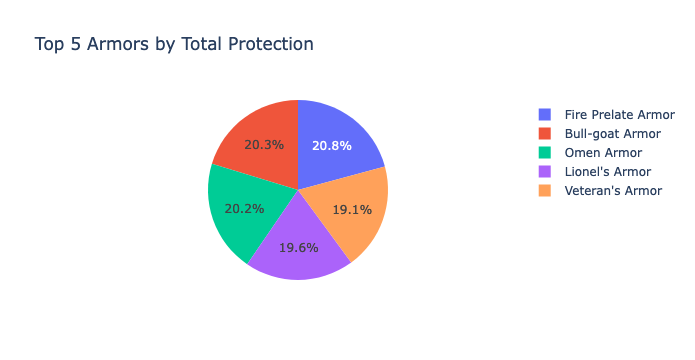

In [19]:

def calculate_total_stat(stat_list):
    return sum(d['amount'] for d in stat_list) if len(stat_list) > 0 else 0

armors_df = datasets['armors']
armors_df['total_dmgNegation'] = armors_df['dmgNegation'].apply(calculate_total_stat)
armors_df['total_resistance'] = armors_df['resistance'].apply(calculate_total_stat)
armors_df['total_protection'] = armors_df['total_dmgNegation'] + armors_df['total_resistance']

# Get top 5 armors by total protection
top_5_powerful_armors = armors_df.nlargest(5, 'total_protection')

# Verify the top 5 powerful armors
print(top_5_powerful_armors[['name', 'total_protection']])


# Interactive pie chart for top 5 armors by total protection
fig = px.pie(
    top_5_powerful_armors,
    names='name',
    values='total_protection',
    title='Top 5 Armors by Total Protection'
)

fig.show()

Counter({'Str': 26, 'Fai': 22, 'Dex': 10})


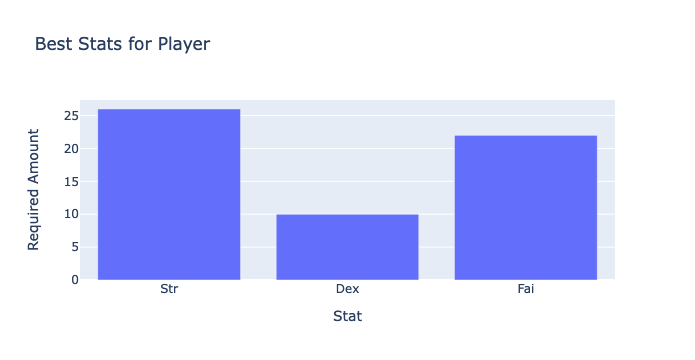

In [24]:
# Calculate best stats for player
most_powerful_weapon = weapons_df.loc[weapons_df['average_attack'].idxmax()]
most_powerful_armor = armors_df.loc[armors_df['total_protection'].idxmax()]

# Extract required attributes for the best weapon and armor
best_stats_weapon = most_powerful_weapon['requiredAttributes']
best_stats_armor = most_powerful_armor.get('requiredAttributes', [])

# Combine and aggregate stats
best_stats = best_stats_weapon + best_stats_armor

from collections import Counter
best_stats_aggregated = Counter()

for stat in best_stats:
    best_stats_aggregated[stat['name']] += stat['amount']

# Verify the best stats
print(best_stats_aggregated)

# Interactive visualization for best stats for player
fig = px.bar(
    x=list(best_stats_aggregated.keys()),
    y=list(best_stats_aggregated.values()),
    title='Best Stats for Player',
    labels={'x': 'Stat', 'y': 'Required Amount'}
)
fig.update_layout(xaxis_title='Stat', yaxis_title='Required Amount')
fig.show()